# Testing WhisperX transcription and timestamps
#### This notebook will serve as support to my Research document by presenting the conducted experiments, testing and evaluation of the WhisperX models regarding its multilingual capabilities, transcription accuracy and evaluation metrics.
* all testing ausio recordings are manually done/gathered by me

## Testing WhisperX for Bulgarian 

In [ ]:
import whisperx
import time
import jiwer
import sacrebleu
import librosa

model = whisperx.load_model("small", device="cpu", compute_type="float32")

audio_file = "Bg.m4a"

start = time.time()
result = model.transcribe(audio_file)
end = time.time()

reference = """Днес сутринта се събудих в лошо настроение, защото навън валеше дъжд. 
Направих си закуска и пих кафе. По-късно ми се обадиха моите приятелки и ме поканиха да излезем на разходка. 
Облякох се и тръгнах. Времето се беше оправило както и моето настроение. 
Разходихме се по магазините на центъра, а след това седнахме да хапнем. 
Чувствах се много добре. Следобед се прибрах и седнах на лаптопа да работя по задачи от университета. 
На една от тях видях много зор. Два часа не можех да оправя една и съща грешка и много се изнервих. 
Вече беше станало късно и легнах да спя."""

print("Transcription:")
for seg in result["segments"]:
    print(f"[{seg['start']:.2f} - {seg['end']:.2f}] {seg['text']}")

transcript_text = " ".join([seg['text'] for seg in result["segments"]])

print("\nFull Transcription:")
print(transcript_text)

wer = jiwer.wer(reference, transcript_text)
cer = jiwer.cer(reference, transcript_text)

chrf = sacrebleu.sentence_chrf( transcript_text, [reference]).score

audio, sr = librosa.load(audio_file, sr=None)
duration_sec = len(audio) / sr
rtf = (end - start) / duration_sec

print("\n--- Evaluation ---")
print(f"WER: {wer:.3f}")
print(f"CER: {cer:.3f}")
print(f"CHRF: {chrf:.3f}")
print(f"RTF: {rtf:.3f}")

No language specified, language will be first be detected for each audio file (increases inference time).
>>Performing voice activity detection using Pyannote...


Lightning automatically upgraded your loaded checkpoint from v1.5.4 to v2.5.5. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint c:\Users\Lenovo X1 Carbon\AppData\Local\Programs\Python\Python311\Lib\site-packages\whisperx\assets\pytorch_model.bin`


Model was trained with pyannote.audio 0.0.1, yours is 3.4.0. Bad things might happen unless you revert pyannote.audio to 0.x.
Model was trained with torch 1.10.0+cu102, yours is 2.8.0+cpu. Bad things might happen unless you revert torch to 1.x.
Detected language: bg (0.97) in first 30s of audio...
Transcription:
[0.03 - 28.46]  Днес отринитът се сабудих лошо настроение, защото на вън валише дъж направих се за куска и пих кафе. По-късно ми се обадиха моите приятелки и ме поканиха да излезим на разходка. Облякох се и тръгнах, но времето вече се беше оправило, както и моето настроение. Разхождахме се по магазините на центъра, а след това седнахме да хапнем. Чуствах се много добре.
[28.46 - 45.31]  Слитобици прибрах и седнах на лапстопа, да работи по задачу от университета. На една от тях видях много зор. Два часа не успявах да направя една и съща гришка и много се изнервих. Вече беше станало късно и легнак да спя.

Full Transcription:
 Днес отринитът се сабудих лошо настроение, защото на 

C:\Users\Lenovo X1 Carbon\AppData\Local\Temp\ipykernel_16780\4082262178.py:43: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(audio_file, sr=None)
c:\Users\Lenovo X1 Carbon\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)



--- Evaluation ---
WER: 0.280
CER: 0.101
CHRF: 81.817
RTF: 0.897


The evaluation of WhisperX transcription for Bulgarian audio shows a Word Error Rate (WER) of 0.280, indicating that approximately 28% of words were transcribed incorrectly which means that a lot of manual editing will be required from the user which is not the best-case scenario. Character Error Rate (CER) of 0.101, reflecting around 10% character-level errors and relatively good fine-grained accuracy. The CHRF score of 81.817 suggests strong overlap in character n-grams, highlighting the system’s ability to capture the overall structure and content of the speech. With a Real-Time Factor (RTF) of 0.897, the transcription operates faster than real time, demonstrating efficient performance suitable for practical applications. As a native bulgarian speaker I would say that the transcription is far from perfect but the meaning is kept. The improvements that could be made are to use a bigger model which for now is not possible due to device limitations or using a model completely programmed for the bulgarian language which is not the case in this internship.

## Testing WhisperX for English together with word level timestamps

In [ ]:
import whisperx
import time
import jiwer
import sacrebleu
import librosa

audio_file = "En.m4a"
reference = """I want to talk about beating stress today. You know, life here in Hong Kong is very stressful so I think today's topic is very useful for everyone because we can do something about it, just to cope with the stress. So maybe you have some change in your life, maybe big change and small change, but instead of being afraid, I think you should have a positive attitude and think of change as a normal part of life. 

And I think maybe here in Hong Kong, the family are crowded into a very small housing space, so maybe you would sometimes argue with your family and I think try to resolve the disagreement with people is very important because then you can build strong relationships and keep commitments you have made. For example, sometimes maybe you are feeling alone and you want to make some comfort and I think you can ask the people you trust for help is very important because if you have a bunch of friends, they can listen to you, then you can release some stress through talking to them. 

And do you know that actually I find a very funny thing that if you want to reduce some stress, you can reduce this by the word S-T-R-E-S-S, that's 'stress'. How about, let's begin with the 'S'. Well, I think 'S' is that you can have the 'scheduling', for example you don't have to schedule too many things in your day and if you feel you are too busy, you can cut out an activity or two. 

And how about the 'T' word? The 'T' word is 'treat your body well', because experts say that exercise can reduce stress and also if you eat healthy food, then your brain and your body get the nourishment they need. 

And the word is 'R' … the next word is 'R' – 'R' is very important, it says 'relax'. You can do an activity you enjoy or that relaxes you, maybe you can read a good book or learn a new hobby and spend time with your pet or even you can visiting a spa and that could make a very good difference. And for me, I like to play piano when I feel stressed and sometimes I may just watch some movie that make me laughs a lot. 

And the next word is 'E' – 'E' is about expectations, and I think be realistic about yourself is to true to yourself and others. So you can just do your best and don't try to be perfect and don't expect others to be too … because that will release and reduce a lot of stress for you and the people around you. 

And the next word is 'S' – 'S' is, stands for 'sleep' and I really, really love to sleep, to be honest. That's my hobby, I think, because sleep … if you get a good night's sleep, then it will keep your mind and your body in shape. And experts say if you sleep more than seven hours, you will actually get tired, so don't sleep too much in the day, just sleep it when you feel enough. 

And the last word is 'S' again. I always do this action, the 'S' word is 'smile' – if you smile and have confidence, your attitude and your thoughts influence the way you see things. And if you are a negative person, you can actually learn to think in a more positive way because that makes you feel more comfortable when you are coping with the stress. Finally I think we should take action and applies these tips to your life, so everyone can beat stress."""

model = whisperx.load_model("small", device="cpu", compute_type="float32")

start_time = time.time()
result = model.transcribe(audio_file)
end_time = time.time()

alignment_model, align_metadata = whisperx.load_align_model(
    language_code=result["language"], device="cpu"
)


audio, sr = librosa.load(audio_file, sr=None)

result_aligned = whisperx.align(
    transcript=result["segments"],
    model=alignment_model,
    align_model_metadata=align_metadata,
    audio=audio,
    device="cpu",
    return_char_alignments=False
)

for word in result_aligned["word_segments"]:
    print(f"[{word['start']:.2f} - {word['end']:.2f}] {word['word']}")

transcript_text = " ".join([w['word'] for w in result_aligned["word_segments"]])

wer = jiwer.wer(reference, transcript_text)
cer = jiwer.cer(reference, transcript_text)
chrf = sacrebleu.sentence_chrf(transcript_text, [reference]).score
duration_sec = len(audio) / sr
rtf = (end_time - start_time) / duration_sec

print("\n--- Evaluation ---")
print(f"WER: {wer:.3f}")
print(f"CER: {cer:.3f}")
print(f"CHRF: {chrf:.3f}")
print(f"RTF: {rtf:.3f}")


No language specified, language will be first be detected for each audio file (increases inference time).
>>Performing voice activity detection using Pyannote...


Lightning automatically upgraded your loaded checkpoint from v1.5.4 to v2.5.5. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint c:\Users\Lenovo X1 Carbon\AppData\Local\Programs\Python\Python311\Lib\site-packages\whisperx\assets\pytorch_model.bin`


Model was trained with pyannote.audio 0.0.1, yours is 3.4.0. Bad things might happen unless you revert pyannote.audio to 0.x.
Model was trained with torch 1.10.0+cu102, yours is 2.8.0+cpu. Bad things might happen unless you revert torch to 1.x.
Detected language: en (0.96) in first 30s of audio...


C:\Users\Lenovo X1 Carbon\AppData\Local\Temp\ipykernel_16780\607846654.py:49: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(audio_file, sr=None)


[0.03 - 1.25] I
[1.27 - 2.00] want
[2.35 - 4.34] to
[4.36 - 4.44] talk
[5.42 - 6.20] about
[6.82 - 7.06] beating
[7.08 - 7.25] stress
[7.45 - 7.75] today.
[7.77 - 7.83] You
[7.85 - 7.95] know,
[7.97 - 8.05] live
[8.07 - 8.15] here
[8.17 - 8.21] in
[9.85 - 10.71] Hong
[10.73 - 10.81] Kong
[10.83 - 10.87] is
[10.89 - 10.97] very
[12.73 - 12.94] stressful,
[12.96 - 12.99] so
[13.02 - 13.04] I
[13.06 - 13.16] think
[13.18 - 13.32] today's
[13.34 - 13.44] topic
[13.46 - 13.50] is
[13.52 - 13.60] very
[13.62 - 13.74] useful
[13.76 - 13.82] for
[13.84 - 14.00] everyone
[15.28 - 15.42] because
[15.44 - 15.48] we
[15.50 - 15.56] can
[15.58 - 15.62] do
[15.64 - 15.82] something
[15.84 - 16.00] about
[16.64 - 16.68] it
[16.70 - 16.78] just
[17.10 - 17.14] to
[17.16 - 17.24] cope
[17.26 - 17.34] with
[17.36 - 17.42] the
[17.44 - 17.58] stress.
[17.56 - 19.07] So
[19.09 - 20.47] maybe
[21.01 - 22.31] you
[23.69 - 24.30] have
[25.08 - 25.68] some
[25.70 - 25.82] change
[27.04 - 27.08] in
[28.06 - 28

The evaluation of WhisperX transcription for English audio shows a Word Error Rate (WER) of 0.167, meaning approximately 17% of words were transcribed incorrectly, and a Character Error Rate (CER) of 0.095, indicating around 9.5% character-level errors and overall high fine-grained accuracy. The CHRF score of 89.565 demonstrates strong overlap in character n-grams, reflecting accurate capture of the speech content and structure. With a Real-Time Factor (RTF) of 0.592, the system processes audio significantly faster than real time, highlighting efficient performance. Overall, WhisperX delivers highly accurate and fast English transcription, suitable for applications where both speed and precision are important.

We can see that it performs way better in bulgarian given the evaluation metrics since it is a more popular languages with more information about words and phonetics.

Moreover, I have also implemented word-level timestamps, since this will allow the user to be able to edit the text, which will also automatically delete this part in the audio recording. However, we can see that the timestamps could not be correct because it takes too much time to say a word - over a second, after manually checking that I realized the timestamps are not very accurate.
## Testing WhisperX for Dutch

In [1]:
import whisperx
import time
import jiwer
import sacrebleu
import librosa

audio_file = "Nl.m4a"
reference = """ Dag bakker, ik heb zo'n honger. Wat wil je hebben? Een broodje. Heb je die? Bakker 
zoekt vrouw? Nee, ik ben alleen maar bezig over De Woude. Vertel 's, jij kent het dorp 
best wel goed als bakker. Dat kan niet anders. Jij spreekt iedereen. Ja,  de meeste 
mensen wel ja. Is het een leuk dorp, ja heel leuk dorp.  
Er wonen, nou ja effe ruim honderd mensen. 
Allemaal klant, nou nee, niet alleemaal. Maar de meeste  2/3 is wel  klant bij me. En hoor 
je dan ook alles van de mensen die hier wonen. Ja 
Ik doe dit al 33 jaar.  Op een gegeven moment dan weet je alle toestanden weet je 
natuurlijk van mensen wel. Hun hele ziel en zaligheid.  
Je bent bakker en half psychiater. Oh ja, is dat zo? 
Oh echt, kun jij me iets negatiefs over de Woude vertellen. 
Nou ja, 's winter dag. Ik heb 't wel gehad toen op een gegeven moment, toen voer het 
pontje niet meer. Toen ben ik over het ijs aan de overkant gekomen. Toen ’t zo koud … 
Allemaal ijs. Toen vroor het zo hard toen voer het pontje niet meer. Dus dan zitten al 
die mensen hier opgesloten. Die zitten gewoon opgesloten. Dan kan je over het ijs lopen. 
Ze zijn eindelijk bevrijd. Nou ja, weet je wat  het is.  Deze mensen hebben ook een eigen bootje. Dus ze kunnen 
ook nog zelf als ze dus… Maar in de winter is het hier een ramp gewoon. 
Je kan er niet om heen. Het eiland moet je op of af met de pont. 
Nou mijn auto die gaat niet van de pont of van het eiland af zonder dat ik er in zit of 
iemand die ik ken en hij ook kent want anders gebeurt het gewoon niet. Dan blijft hij 
gewoon staan. 
Als dan Bob en Marjan bijvoorbeeld een feestje geven, dan weet jij precies wie er naar 
hun feestje toegaat en wanneer ze naar huis gingen en hoe ze naar huis gingen en of ze 
een groot cadeau meebrachten. Ja, in de regel wel. En zo af en toe gebeurt het dat ik 
mensen aan die kant krijg en rustig zeg, ja, ze zijn niet thuis. En dan gaan ze weer. Oh 
ja? 
U wilt naar weet ik hoe ze heten. Helaas, draait U maar weer om,  ze komen om vier uur 
thuis. Nou ja, als ze er niet zijn dan zijn ze er niet. En waarom moet je ze dan 
overzetten. 
En hoe vaak ga je op en neer op een dag. Geen flauw idee. Doe 's een gooi. Daar is geen 
peil op te trekken. 
Het is eigenlijk een soort lift, toch? Het is niet zo dat het een hele toer is om d’r op en 
d’r af te gaan. Nee ,dat is waar Het is gewoon een verlengstuk van de weg. Dan wel jouw 
beroep. Niet meer en niet minder. Wat ben je van beroep? Een verlengstuk van de weg. 
Oh jee, ik sta er midden tussen. Over dat kleine stukje water kan natuurlijk best een 
brug. Alleen ziet maar liefst 85% van de inwoners dit niet zitten. Waarom een brug. 
Vertel me nou toch. Geen brug. Absoluut  niet. Dan blaas ik hem op. Het houdt een hoop 
mensen toch op afstand. En dat willen we graag zo houden. 
Is er veel veranderd hier. Ja, veel nieuwkomers. Ja, ik zeg geen import want dat vind ik 
een rotwoord. Een hoop mensen zeggen , hebben het over import maar dat vind ik een 
rotwoord, toch? Dat vindt u niet aardig klinken. Nee. 
Bent u blij met de nieuwkomers. Jawel, ik heb er geen moeite mee. Nee. Zijn er mensen 
die er moeite mee hebben dan? D'r waren een paar mensen die hadden daar moeite mee 
terwijl ze zelf d'r huis, zeg maar aan import verkochten. Ja, ja.  Daarom vind ik het zo'n 
rotwoord."""

model = whisperx.load_model("small", device="cpu", compute_type="float32")

start_time = time.time()
result = model.transcribe(audio_file)
end_time = time.time()

alignment_model, align_metadata = whisperx.load_align_model(
    language_code=result["language"], device="cpu"
)


audio, sr = librosa.load(audio_file, sr=None)

result_aligned = whisperx.align(
    transcript=result["segments"],
    model=alignment_model,
    align_model_metadata=align_metadata,
    audio=audio,
    device="cpu",
    return_char_alignments=False
)

for word in result_aligned["word_segments"]:
    print(f"[{word['start']:.2f} - {word['end']:.2f}] {word['word']}")

transcript_text = " ".join([w['word'] for w in result_aligned["word_segments"]])

wer = jiwer.wer(reference, transcript_text)
cer = jiwer.cer(reference, transcript_text)
chrf = sacrebleu.sentence_chrf(transcript_text, [reference]).score
duration_sec = len(audio) / sr
rtf = (end_time - start_time) / duration_sec

print("\n--- Evaluation ---")
print(f"WER: {wer:.3f}")
print(f"CER: {cer:.3f}")
print(f"CHRF: {chrf:.3f}")
print(f"RTF: {rtf:.3f}")


c:\Users\Lenovo X1 Carbon\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Lenovo X1 Carbon\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyannote\audio\core\io.py:212: UserWarning: torchaudio._backend.list_audio_backends has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and encoding capabilities of PyTorch for both audio and video are being consolidated into TorchCodec. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be removed from the 2.9 release. 
  torchaudio.list_audio_backends()
c:\Users\Lenovo X1 Carbon\AppData\Local\Programs\Python\Python311\Lib\site-packages\speechbrain\utils\torch_audio_backend.py:57: UserWarning: torc

No language specified, language will be first be detected for each audio file (increases inference time).
>>Performing voice activity detection using Pyannote...


c:\Users\Lenovo X1 Carbon\AppData\Local\Programs\Python\Python311\Lib\inspect.py:988: UserWarning: Module 'speechbrain.pretrained' was deprecated, redirecting to 'speechbrain.inference'. Please update your script. This is a change from SpeechBrain 1.0. See: https://github.com/speechbrain/speechbrain/releases/tag/v1.0.0
  if ismodule(module) and hasattr(module, '__file__'):
Lightning automatically upgraded your loaded checkpoint from v1.5.4 to v2.5.5. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint c:\Users\Lenovo X1 Carbon\AppData\Local\Programs\Python\Python311\Lib\site-packages\whisperx\assets\pytorch_model.bin`
c:\Users\Lenovo X1 Carbon\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyannote\audio\core\io.py:212: UserWarning: torchaudio._backend.list_audio_backends has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and enco

Model was trained with pyannote.audio 0.0.1, yours is 3.4.0. Bad things might happen unless you revert pyannote.audio to 0.x.
Model was trained with torch 1.10.0+cu102, yours is 2.8.0+cpu. Bad things might happen unless you revert torch to 1.x.
Detected language: nl (0.99) in first 30s of audio...


Fetching 1 files: 100%|██████████| 1/1 [00:00<?, ?it/s]
C:\Users\Lenovo X1 Carbon\AppData\Local\Temp\ipykernel_12620\3750718485.py:65: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(audio_file, sr=None)
c:\Users\Lenovo X1 Carbon\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


[3.66 - 9.79] Ik
[9.81 - 9.87] mag
[9.89 - 10.17] bakken.
[10.19 - 10.23] Ik
[10.27 - 10.61] heb
[10.67 - 11.51] zo'n
[14.86 - 20.20] honger.
[20.22 - 20.28] Wat
[20.30 - 20.36] wil
[20.38 - 20.42] je
[20.44 - 20.58] hebben?
[20.60 - 20.66] Een
[20.68 - 20.84] broodje.
[20.86 - 20.92] Heb
[20.94 - 20.98] je
[21.00 - 21.08] die?
[21.10 - 21.23] Bakken
[21.25 - 21.29] ze
[21.30 - 21.36] een
[21.39 - 21.62] vrouw?
[21.64 - 21.73] Nee,
[21.75 - 23.33] nee,
[23.35 - 23.43] nee.
[23.45 - 23.49] Ik
[23.51 - 23.57] ben
[23.59 - 23.71] alleen
[23.73 - 23.81] maar
[23.83 - 23.93] bezig
[23.95 - 24.03] hier
[24.05 - 24.13] over
[24.15 - 24.19] de
[24.21 - 24.35] wouden.
[24.37 - 24.43] Ja.
[24.45 - 24.57] Vertel
[24.59 - 24.69] eens,
[24.71 - 24.75] je
[24.77 - 24.85] kent
[24.87 - 24.93] het
[24.95 - 25.03] best
[25.05 - 25.15] wel
[25.17 - 25.25] goed
[25.27 - 25.33] als
[25.35 - 25.49] bakker.
[25.51 - 25.57] Dat
[25.59 - 25.65] kan
[25.67 - 25.75] niet
[25.77 - 25.91] anders,
[25.93 - 25.97] 

The evaluation of WhisperX transcription for Dutch audio shows a Word Error Rate (WER) of 0.444, indicating that roughly 44% of words were transcribed incorrectly, and a Character Error Rate (CER) of 0.245, reflecting about 24.5% character-level errors, which points to moderate accuracy. The CHRF score of 74.519 suggests lower overlap in character n-grams compared to other languages, highlighting challenges in capturing the full structure and content of Dutch speech. With a Real-Time Factor (RTF) of 0.776, the transcription is faster than real time, showing efficient processing despite higher error rates. Overall, WhisperX provides reasonably fast transcription for Dutch, but word- and character-level accuracy is lower than for English or Bulgarian, indicating potential need for further refinement or adaptation to the language.

This may have occured due to the fact that in the audio multiple speakers take place.

Another thing that we can again notice are the wrong timestamps - it takes 6 seconds to say a word.

The next chunk will use another dutch audio file with one speaker to check for improvements.

In [ ]:
import whisperx
import time
import jiwer
import sacrebleu
import librosa

audio_file = "ABB 2.m4a"
reference = """ De avondzon zakte langzaam achter de huizen, terwijl de lucht vol kleuren stond. Een zachte wind bewoog de bladeren, alsof de bomen fluisterden. In de verte klonk het geluid van fietsen op een kasseienstraat, vermengd met het geroezemoes van stemmen. Voor een ogenblik leek de wereld stil te staan, gevangen in een rustig en bijna magisch moment."""

model = whisperx.load_model("small", device="cpu", compute_type="float32")

start_time = time.time()
result = model.transcribe(audio_file)
end_time = time.time()

alignment_model, align_metadata = whisperx.load_align_model(
    language_code=result["language"], device="cpu"
)


audio, sr = librosa.load(audio_file, sr=None)

result_aligned = whisperx.align(
    transcript=result["segments"],
    model=alignment_model,
    align_model_metadata=align_metadata,
    audio=audio,
    device="cpu",
    return_char_alignments=False
)

for word in result_aligned["word_segments"]:
    print(f"[{word['start']:.2f} - {word['end']:.2f}] {word['word']}")

transcript_text = " ".join([w['word'] for w in result_aligned["word_segments"]])

wer = jiwer.wer(reference, transcript_text)
cer = jiwer.cer(reference, transcript_text)
chrf = sacrebleu.sentence_chrf(transcript_text, [reference]).score
duration_sec = len(audio) / sr
rtf = (end_time - start_time) / duration_sec

print("\n--- Evaluation ---")
print(f"WER: {wer:.3f}")
print(f"CER: {cer:.3f}")
print(f"CHRF: {chrf:.3f}")
print(f"RTF: {rtf:.3f}")


c:\Users\Lenovo X1 Carbon\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Lenovo X1 Carbon\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyannote\audio\core\io.py:212: UserWarning: torchaudio._backend.list_audio_backends has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and encoding capabilities of PyTorch for both audio and video are being consolidated into TorchCodec. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be removed from the 2.9 release. 
  torchaudio.list_audio_backends()
c:\Users\Lenovo X1 Carbon\AppData\Local\Programs\Python\Python311\Lib\site-packages\speechbrain\utils\torch_audio_backend.py:57: UserWarning: torc

No language specified, language will be first be detected for each audio file (increases inference time).
>>Performing voice activity detection using Pyannote...


c:\Users\Lenovo X1 Carbon\AppData\Local\Programs\Python\Python311\Lib\inspect.py:988: UserWarning: Module 'speechbrain.pretrained' was deprecated, redirecting to 'speechbrain.inference'. Please update your script. This is a change from SpeechBrain 1.0. See: https://github.com/speechbrain/speechbrain/releases/tag/v1.0.0
  if ismodule(module) and hasattr(module, '__file__'):
Lightning automatically upgraded your loaded checkpoint from v1.5.4 to v2.5.5. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint c:\Users\Lenovo X1 Carbon\AppData\Local\Programs\Python\Python311\Lib\site-packages\whisperx\assets\pytorch_model.bin`
c:\Users\Lenovo X1 Carbon\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyannote\audio\core\io.py:212: UserWarning: torchaudio._backend.list_audio_backends has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and enco

Model was trained with pyannote.audio 0.0.1, yours is 3.4.0. Bad things might happen unless you revert pyannote.audio to 0.x.
Model was trained with torch 1.10.0+cu102, yours is 2.8.0+cpu. Bad things might happen unless you revert torch to 1.x.
Detected language: nl (0.97) in first 30s of audio...


Fetching 1 files: 100%|██████████| 1/1 [00:00<?, ?it/s]
C:\Users\Lenovo X1 Carbon\AppData\Local\Temp\ipykernel_221236\918423095.py:21: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(audio_file, sr=None)
c:\Users\Lenovo X1 Carbon\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


[1.84 - 10.37] De
[10.39 - 21.15] avondzond
[21.17 - 21.27] zakte
[21.29 - 21.45] langzaam
[21.47 - 21.59] achter
[21.61 - 21.65] de
[21.67 - 21.81] huizen,
[21.83 - 21.97] terwijl
[21.99 - 22.03] de
[22.05 - 22.15] lucht
[22.17 - 22.33] volkleur
[22.35 - 22.39] in
[22.41 - 22.55] stront.
[22.57 - 22.63] Een
[22.65 - 22.77] zachte
[22.79 - 22.87] wind
[22.89 - 23.03] bewogen
[23.05 - 23.09] de
[23.11 - 23.29] bladeren,
[23.31 - 23.41] alsof
[23.43 - 23.47] de
[23.49 - 23.59] bomen
[23.61 - 23.85] vluisterden.
[23.87 - 23.91] In
[23.93 - 23.97] de
[23.99 - 24.09] verte
[24.11 - 24.21] klonk
[24.23 - 24.29] het
[24.31 - 24.43] geluid
[24.45 - 24.51] van
[24.53 - 24.67] fietsen
[24.69 - 24.73] op
[24.75 - 24.81] een
[24.83 - 24.95] kassei
[24.97 - 25.01] in
[25.03 - 25.07] de
[25.09 - 25.23] straat,
[25.25 - 25.41] vermengd
[25.43 - 25.49] met
[25.51 - 25.57] het
[25.59 - 25.81] geroezemoes
[25.83 - 25.89] van
[25.91 - 26.07] stemmen.
[26.09 - 26.17] Voor
[26.19 - 26.25] een
[26.27 - 26.4

c:\Users\Lenovo X1 Carbon\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Lenovo X1 Carbon\.cache\huggingface\hub\models--jonatasgrosman--wav2vec2-large-xlsr-53-dutch. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


We can see that all the evaluation metrics are way better comparing to the first dutch audio. Now there are only 4% wrong characters, the CHRF is higher and the WER and RTF are lower which suggest faster and more accurate transcription.

However, the word timestamps are still incorrect.

After researching it turns out that the WhisperX model performs the best with sampling rate of 16kHz which means that I have to preprocess the audio to the correct rate first and then test the model on it and this is exactly what I will do in the next chunk to check for improvements.

In [ ]:
import whisperx
import time
import jiwer
import sacrebleu
import librosa

audio_file = "ABB 2.m4a"
reference = """ De avondzon zakte langzaam achter de huizen, terwijl de lucht vol kleuren stond. Een zachte wind bewoog de bladeren, alsof de bomen fluisterden. In de verte klonk het geluid van fietsen op een kasseienstraat, vermengd met het geroezemoes van stemmen. Voor een ogenblik leek de wereld stil te staan, gevangen in een rustig en bijna magisch moment."""

device = "cpu"

model = whisperx.load_model("small", device=device, compute_type="float32")

start_time = time.time()
result = model.transcribe(audio_file)
end_time = time.time()

audio, sr = librosa.load(audio_file, sr=16000, mono=True)
duration_sec = len(audio) / sr
print(f"Loaded audio sr={sr}, duration={duration_sec:.2f}s")

alignment_model, align_metadata = whisperx.load_align_model(
    language_code=result["language"], device=device
)

result_aligned = whisperx.align(
    transcript=result["segments"],
    model=alignment_model,
    align_model_metadata=align_metadata,
    audio=audio,
    device=device,
    return_char_alignments=False
)

for word in result_aligned["word_segments"]:
    w = word["word"].strip()
    print(f"[{word['start']:.3f} - {word['end']:.3f}] {w}")

transcript_text = " ".join([w['word'].strip() for w in result_aligned["word_segments"]])
transcript_text = " ".join(transcript_text.split())

wer = jiwer.wer(reference, transcript_text)
cer = jiwer.cer(reference, transcript_text)
chrf = sacrebleu.sentence_chrf(transcript_text, [reference]).score
rtf = (end_time - start_time) / duration_sec

print("\n--- Evaluation ---")
print(f"WER: {wer:.3f}")
print(f"CER: {cer:.3f}")
print(f"CHRF: {chrf:.3f}")
print(f"RTF: {rtf:.3f}")


No language specified, language will be first be detected for each audio file (increases inference time).
>>Performing voice activity detection using Pyannote...


Lightning automatically upgraded your loaded checkpoint from v1.5.4 to v2.5.5. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint c:\Users\Lenovo X1 Carbon\AppData\Local\Programs\Python\Python311\Lib\site-packages\whisperx\assets\pytorch_model.bin`
c:\Users\Lenovo X1 Carbon\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyannote\audio\core\io.py:212: UserWarning: torchaudio._backend.list_audio_backends has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and encoding capabilities of PyTorch for both audio and video are being consolidated into TorchCodec. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be removed from the 2.9 release. 
  torchaudio.list_audio_backends()


Model was trained with pyannote.audio 0.0.1, yours is 3.4.0. Bad things might happen unless you revert pyannote.audio to 0.x.
Model was trained with torch 1.10.0+cu102, yours is 2.8.0+cpu. Bad things might happen unless you revert torch to 1.x.
Detected language: nl (0.97) in first 30s of audio...


C:\Users\Lenovo X1 Carbon\AppData\Local\Temp\ipykernel_221236\79163863.py:21: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(audio_file, sr=16000, mono=True)
c:\Users\Lenovo X1 Carbon\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Loaded audio sr=16000, duration=28.50s


Fetching 1 files: 100%|██████████| 1/1 [00:00<00:00, 187.59it/s]


[1.837 - 1.957] De
[2.017 - 2.678] avondzond
[2.738 - 3.019] zakte
[3.039 - 3.520] langzaam
[3.560 - 3.780] achter
[3.800 - 3.860] de
[3.900 - 4.841] huizen,
[4.862 - 5.142] terwijl
[5.182 - 5.262] de
[5.322 - 5.563] lucht
[5.983 - 6.544] volkleur
[6.564 - 6.684] in
[6.704 - 8.126] stront.
[8.146 - 8.267] Een
[8.287 - 8.627] zachte
[8.667 - 8.928] wind
[8.968 - 9.328] bewogen
[9.348 - 9.428] de
[9.468 - 10.230] bladeren,
[10.310 - 10.550] alsof
[10.610 - 10.690] de
[10.730 - 11.171] bomen
[11.211 - 12.893] vluisterden.
[12.934 - 12.994] In
[13.054 - 13.114] de
[13.174 - 13.494] verte
[13.534 - 13.775] klonk
[13.795 - 13.915] het
[13.955 - 14.276] geluid
[14.316 - 14.496] van
[14.536 - 14.997] fietsen
[15.057 - 15.157] op
[15.237 - 15.357] een
[17.400 - 17.821] kassei
[17.841 - 17.941] in
[17.961 - 18.001] de
[18.021 - 19.523] straat,
[19.563 - 20.024] vermengd
[20.064 - 20.164] met
[20.184 - 20.305] het
[20.365 - 20.865] geroezemoes
[20.885 - 21.046] van
[21.066 - 22.107] stemmen.
[22.

Now we can see the correct timestamps of each word. It also turns out that the correct sampling rate only helps with the word-level timestamps and not the evaluation metrics (transcription accuracy and precision). However, the evaluation metrics are good enough and there was no great need for improvement.

Now, I will also apply the audio resmpling to the English audio to check if it also provides us with accurate timestamps.

In [ ]:
import whisperx
import time
import jiwer
import sacrebleu
import librosa

audio_file = "En.m4a"
reference = """I want to talk about beating stress today. You know, life here in Hong Kong is very stressful so I think today's topic is very useful for everyone because we can do something about it, just to cope with the stress. So maybe you have some change in your life, maybe big change and small change, but instead of being afraid, I think you should have a positive attitude and think of change as a normal part of life. 

And I think maybe here in Hong Kong, the family are crowded into a very small housing space, so maybe you would sometimes argue with your family and I think try to resolve the disagreement with people is very important because then you can build strong relationships and keep commitments you have made. For example, sometimes maybe you are feeling alone and you want to make some comfort and I think you can ask the people you trust for help is very important because if you have a bunch of friends, they can listen to you, then you can release some stress through talking to them. 

And do you know that actually I find a very funny thing that if you want to reduce some stress, you can reduce this by the word S-T-R-E-S-S, that's 'stress'. How about, let's begin with the 'S'. Well, I think 'S' is that you can have the 'scheduling', for example you don't have to schedule too many things in your day and if you feel you are too busy, you can cut out an activity or two. 

And how about the 'T' word? The 'T' word is 'treat your body well', because experts say that exercise can reduce stress and also if you eat healthy food, then your brain and your body get the nourishment they need. 

And the word is 'R' … the next word is 'R' – 'R' is very important, it says 'relax'. You can do an activity you enjoy or that relaxes you, maybe you can read a good book or learn a new hobby and spend time with your pet or even you can visiting a spa and that could make a very good difference. And for me, I like to play piano when I feel stressed and sometimes I may just watch some movie that make me laughs a lot. 

And the next word is 'E' – 'E' is about expectations, and I think be realistic about yourself is to true to yourself and others. So you can just do your best and don't try to be perfect and don't expect others to be too … because that will release and reduce a lot of stress for you and the people around you. 

And the next word is 'S' – 'S' is, stands for 'sleep' and I really, really love to sleep, to be honest. That's my hobby, I think, because sleep … if you get a good night's sleep, then it will keep your mind and your body in shape. And experts say if you sleep more than seven hours, you will actually get tired, so don't sleep too much in the day, just sleep it when you feel enough. 

And the last word is 'S' again. I always do this action, the 'S' word is 'smile' – if you smile and have confidence, your attitude and your thoughts influence the way you see things. And if you are a negative person, you can actually learn to think in a more positive way because that makes you feel more comfortable when you are coping with the stress. Finally I think we should take action and applies these tips to your life, so everyone can beat stress."""

device = "cpu"

model = whisperx.load_model("small", device=device, compute_type="float32")

start_time = time.time()
result = model.transcribe(audio_file)
end_time = time.time()

alignment_model, align_metadata = whisperx.load_align_model(
    language_code=result["language"], device=device
)

audio, sr = librosa.load(audio_file, sr=16000, mono=True)
duration_sec = len(audio) / sr
print(f"Loaded audio sr={sr}, duration={duration_sec:.2f}s")

result_aligned = whisperx.align(
    transcript=result["segments"],
    model=alignment_model,
    align_model_metadata=align_metadata,
    audio=audio,
    device=device,
    return_char_alignments=False
)

for word in result_aligned["word_segments"]:
    print(f"[{word['start']:.2f} - {word['end']:.2f}] {word['word'].strip()}")

transcript_text = " ".join([w['word'].strip() for w in result_aligned["word_segments"]])
transcript_text = " ".join(transcript_text.split())  # normalize spaces

wer = jiwer.wer(reference, transcript_text)
cer = jiwer.cer(reference, transcript_text)
chrf = sacrebleu.sentence_chrf(transcript_text, [reference]).score
rtf = (end_time - start_time) / duration_sec

print("\n--- Evaluation ---")
print(f"WER: {wer:.3f}")
print(f"CER: {cer:.3f}")
print(f"CHRF: {chrf:.3f}")
print(f"RTF: {rtf:.3f}")


Lightning automatically upgraded your loaded checkpoint from v1.5.4 to v2.5.5. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint c:\Users\Lenovo X1 Carbon\AppData\Local\Programs\Python\Python311\Lib\site-packages\whisperx\assets\pytorch_model.bin`


No language specified, language will be first be detected for each audio file (increases inference time).
>>Performing voice activity detection using Pyannote...
Model was trained with pyannote.audio 0.0.1, yours is 3.4.0. Bad things might happen unless you revert pyannote.audio to 0.x.
Model was trained with torch 1.10.0+cu102, yours is 2.8.0+cpu. Bad things might happen unless you revert torch to 1.x.
Detected language: en (0.96) in first 30s of audio...


C:\Users\Lenovo X1 Carbon\AppData\Local\Temp\ipykernel_12452\2483864338.py:39: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(audio_file, sr=16000, mono=True)
c:\Users\Lenovo X1 Carbon\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Loaded audio sr=16000, duration=278.01s
[0.03 - 0.25] I
[0.29 - 0.43] want
[0.45 - 0.53] to
[0.59 - 0.83] talk
[0.89 - 1.39] about
[1.43 - 2.23] beating
[2.25 - 2.68] stress
[2.72 - 3.02] today.
[3.06 - 4.74] You
[4.78 - 4.98] know,
[5.60 - 5.84] live
[5.88 - 6.06] here
[6.10 - 6.18] in
[6.24 - 6.42] Hong
[6.44 - 6.72] Kong
[6.74 - 6.78] is
[6.84 - 7.08] very
[7.14 - 7.75] stressful,
[7.85 - 8.09] so
[8.11 - 8.13] I
[8.71 - 8.85] think
[9.01 - 9.37] today's
[9.45 - 9.89] topic
[9.97 - 10.03] is
[10.11 - 10.29] very
[10.41 - 10.75] useful
[10.79 - 10.91] for
[11.03 - 11.35] everyone
[11.41 - 11.73] because
[12.97 - 13.08] we
[13.10 - 13.26] can
[13.34 - 13.48] do
[13.52 - 13.92] something
[14.00 - 14.38] about
[14.42 - 14.86] it
[15.80 - 16.00] just
[16.04 - 16.12] to
[16.18 - 16.36] cope
[16.38 - 16.52] with
[16.56 - 16.66] the
[16.68 - 17.58] stress.
[17.56 - 18.34] So
[18.73 - 18.95] maybe
[19.01 - 19.13] you
[19.19 - 19.37] have
[19.47 - 19.69] some
[19.95 - 20.35] change
[20.55 - 2

We can notice the same thing here - correct word-level timestamps. Evaluation metrics remain the same.

For exploration reasons, I am curious to check what happens when I perform noise reduction and loudness noramlization to an audio and check if it helps the model perform better than using the raw audio.

In [ ]:
import whisperx
import time
import jiwer
import sacrebleu
import librosa
import noisereduce as nr
import pyloudnorm as pyln
import numpy as np

audio_file = "ABB 2.m4a"
reference = """ De avondzon zakte langzaam achter de huizen, terwijl de lucht vol kleuren stond. Een zachte wind bewoog de bladeren, alsof de bomen fluisterden. In de verte klonk het geluid van fietsen op een kasseienstraat, vermengd met het geroezemoes van stemmen. Voor een ogenblik leek de wereld stil te staan, gevangen in een rustig en bijna magisch moment."""

device = "cpu"

model = whisperx.load_model("small", device=device, compute_type="float32")

start_time = time.time()
result = model.transcribe(audio_file)
end_time = time.time()

audio, sr = librosa.load(audio_file, sr=16000, mono=True)
duration_sec = len(audio) / sr
print(f"Loaded audio sr={sr}, duration={duration_sec:.2f}s")

print("Applying noise reduction...")
audio = nr.reduce_noise(y=audio, sr=sr)

print("Applying loudness normalization...")
meter = pyln.Meter(sr)  # create loudness meter
loudness = meter.integrated_loudness(audio)
audio = pyln.normalize.loudness(audio, loudness, -23.0)

audio = audio.astype(np.float32)

alignment_model, align_metadata = whisperx.load_align_model(
    language_code=result["language"], device=device
)

result_aligned = whisperx.align(
    transcript=result["segments"],
    model=alignment_model,
    align_model_metadata=align_metadata,
    audio=audio,
    device=device,
    return_char_alignments=False
)

for word in result_aligned["word_segments"]:
    w = word["word"].strip()
    print(f"[{word['start']:.3f} - {word['end']:.3f}] {w}")

transcript_text = " ".join([w['word'].strip() for w in result_aligned["word_segments"]])
transcript_text = " ".join(transcript_text.split())

wer = jiwer.wer(reference, transcript_text)
cer = jiwer.cer(reference, transcript_text)
chrf = sacrebleu.sentence_chrf(transcript_text, [reference]).score
rtf = (end_time - start_time) / duration_sec

print("\n--- Evaluation ---")
print(f"WER: {wer:.3f}")
print(f"CER: {cer:.3f}")
print(f"CHRF: {chrf:.3f}")
print(f"RTF: {rtf:.3f}")


No language specified, language will be first be detected for each audio file (increases inference time).
>>Performing voice activity detection using Pyannote...


Lightning automatically upgraded your loaded checkpoint from v1.5.4 to v2.5.5. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint c:\Users\Lenovo X1 Carbon\AppData\Local\Programs\Python\Python311\Lib\site-packages\whisperx\assets\pytorch_model.bin`
c:\Users\Lenovo X1 Carbon\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyannote\audio\core\io.py:212: UserWarning: torchaudio._backend.list_audio_backends has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and encoding capabilities of PyTorch for both audio and video are being consolidated into TorchCodec. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be removed from the 2.9 release. 
  torchaudio.list_audio_backends()


Model was trained with pyannote.audio 0.0.1, yours is 3.4.0. Bad things might happen unless you revert pyannote.audio to 0.x.
Model was trained with torch 1.10.0+cu102, yours is 2.8.0+cpu. Bad things might happen unless you revert torch to 1.x.
Detected language: nl (0.97) in first 30s of audio...


C:\Users\Lenovo X1 Carbon\AppData\Local\Temp\ipykernel_12452\2024523302.py:24: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(audio_file, sr=16000, mono=True)
c:\Users\Lenovo X1 Carbon\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Loaded audio sr=16000, duration=28.50s
Applying noise reduction...
Applying loudness normalization...


c:\Users\Lenovo X1 Carbon\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyloudnorm\normalize.py:62: UserWarning: Possible clipped samples in output.
  warnings.warn("Possible clipped samples in output.")
Fetching 1 files: 100%|██████████| 1/1 [00:00<?, ?it/s]


[1.837 - 1.957] De
[2.017 - 2.738] avondzond
[2.758 - 3.019] zakte
[3.059 - 3.540] langzaam
[3.560 - 3.780] achter
[3.800 - 3.840] de
[3.860 - 4.841] huizen,
[4.862 - 5.142] terwijl
[5.182 - 5.262] de
[5.322 - 5.943] lucht
[5.983 - 6.544] volkleur
[6.564 - 6.684] in
[6.704 - 8.146] stront.
[8.166 - 8.267] Een
[8.287 - 8.627] zachte
[8.667 - 8.908] wind
[8.968 - 9.368] bewogen
[9.388 - 9.428] de
[9.468 - 10.270] bladeren,
[10.310 - 10.570] alsof
[10.610 - 10.690] de
[10.710 - 11.171] bomen
[11.211 - 12.914] vluisterden.
[12.934 - 13.014] In
[13.054 - 13.134] de
[13.174 - 13.514] verte
[13.534 - 13.775] klonk
[13.815 - 13.915] het
[13.955 - 14.276] geluid
[14.316 - 14.496] van
[14.576 - 14.997] fietsen
[15.057 - 15.157] op
[15.217 - 17.320] een
[17.360 - 17.821] kassei
[17.841 - 17.941] in
[17.961 - 18.001] de
[18.021 - 19.583] straat,
[19.604 - 20.004] vermengd
[20.044 - 20.164] met
[20.204 - 20.305] het
[20.365 - 20.865] geroezemoes
[20.885 - 21.046] van
[21.066 - 22.127] stemmen.
[22.

We can see no change in the evaluation metrics after noise reduction and loudness normalization. This happens becaue WhisperX already deals successfully with such problems.

To further investigate sound, I will also perform silence trimming and check the evaluation metrics again.

In [ ]:
import whisperx
import time
import jiwer
import sacrebleu
import librosa
import noisereduce as nr
import pyloudnorm as pyln
import numpy as np

audio_file = "ABB 2.m4a"
reference = """ De avondzon zakte langzaam achter de huizen, terwijl de lucht vol kleuren stond. Een zachte wind bewoog de bladeren, alsof de bomen fluisterden. In de verte klonk het geluid van fietsen op een kasseienstraat, vermengd met het geroezemoes van stemmen. Voor een ogenblik leek de wereld stil te staan, gevangen in een rustig en bijna magisch moment."""

device = "cpu"

model = whisperx.load_model("small", device=device, compute_type="float32")

start_time = time.time()
result = model.transcribe(audio_file)
end_time = time.time()

audio, sr = librosa.load(audio_file, sr=16000, mono=True)
duration_sec = len(audio) / sr
print(f"Loaded audio sr={sr}, duration={duration_sec:.2f}s")

print("Applying noise reduction...")
audio = nr.reduce_noise(y=audio, sr=sr)

print("Applying loudness normalization...")
meter = pyln.Meter(sr)  
loudness = meter.integrated_loudness(audio)
audio = pyln.normalize.loudness(audio, loudness, -23.0)

print("Applying silence trimming...")
intervals = librosa.effects.split(audio, top_db=30)  
audio_trimmed = np.concatenate([audio[start:end] for start, end in intervals])
audio = audio_trimmed.astype(np.float32)

alignment_model, align_metadata = whisperx.load_align_model(
    language_code=result["language"], device=device
)

result_aligned = whisperx.align(
    transcript=result["segments"],
    model=alignment_model,
    align_model_metadata=align_metadata,
    audio=audio,
    device=device,
    return_char_alignments=False
)

for word in result_aligned["word_segments"]:
    w = word["word"].strip()
    print(f"[{word['start']:.3f} - {word['end']:.3f}] {w}")

transcript_text = " ".join([w['word'].strip() for w in result_aligned["word_segments"]])
transcript_text = " ".join(transcript_text.split())

wer = jiwer.wer(reference, transcript_text)
cer = jiwer.cer(reference, transcript_text)
chrf = sacrebleu.sentence_chrf(transcript_text, [reference]).score
rtf = (end_time - start_time) / duration_sec

print("\n--- Evaluation ---")
print(f"WER: {wer:.3f}")
print(f"CER: {cer:.3f}")
print(f"CHRF: {chrf:.3f}")
print(f"RTF: {rtf:.3f}")


No language specified, language will be first be detected for each audio file (increases inference time).
>>Performing voice activity detection using Pyannote...


Lightning automatically upgraded your loaded checkpoint from v1.5.4 to v2.5.5. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint c:\Users\Lenovo X1 Carbon\AppData\Local\Programs\Python\Python311\Lib\site-packages\whisperx\assets\pytorch_model.bin`
c:\Users\Lenovo X1 Carbon\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyannote\audio\core\io.py:212: UserWarning: torchaudio._backend.list_audio_backends has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and encoding capabilities of PyTorch for both audio and video are being consolidated into TorchCodec. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be removed from the 2.9 release. 
  torchaudio.list_audio_backends()


Model was trained with pyannote.audio 0.0.1, yours is 3.4.0. Bad things might happen unless you revert pyannote.audio to 0.x.
Model was trained with torch 1.10.0+cu102, yours is 2.8.0+cpu. Bad things might happen unless you revert torch to 1.x.
Detected language: nl (0.97) in first 30s of audio...


C:\Users\Lenovo X1 Carbon\AppData\Local\Temp\ipykernel_12452\4214367495.py:24: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(audio_file, sr=16000, mono=True)
c:\Users\Lenovo X1 Carbon\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Loaded audio sr=16000, duration=28.50s
Applying noise reduction...
Applying loudness normalization...
Applying silence trimming...


c:\Users\Lenovo X1 Carbon\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyloudnorm\normalize.py:62: UserWarning: Possible clipped samples in output.
  warnings.warn("Possible clipped samples in output.")
Fetching 1 files: 100%|██████████| 1/1 [00:00<?, ?it/s]


[1.837 - 2.543] De
[2.577 - 2.947] avondzond
[2.981 - 3.284] zakte
[3.351 - 3.620] langzaam
[3.654 - 3.855] achter
[3.889 - 3.956] de
[3.990 - 4.259] huizen,
[4.293 - 4.562] terwijl
[4.596 - 4.663] de
[4.696 - 4.865] lucht
[4.898 - 5.167] volkleur
[5.201 - 5.403] in
[5.437 - 5.840] stront.
[5.874 - 5.975] Een
[6.042 - 6.614] zachte
[6.648 - 6.984] wind
[7.051 - 7.724] bewogen
[7.758 - 7.825] de
[7.859 - 8.834] bladeren,
[8.868 - 9.406] alsof
[9.440 - 9.507] de
[9.541 - 10.315] bomen
[10.348 - 11.391] vluisterden.
[11.425 - 11.526] In
[11.559 - 11.727] de
[11.761 - 12.468] verte
[12.501 - 12.804] klonk
[12.838 - 13.039] het
[13.073 - 13.645] geluid
[13.679 - 13.914] van
[13.981 - 14.688] fietsen
[14.789 - 14.957] op
[14.991 - 15.462] een
[15.529 - 16.336] kassei
[16.370 - 16.504] in
[16.538 - 16.605] de
[16.639 - 17.211] straat,
[17.245 - 17.985] vermengd
[18.052 - 18.186] met
[18.287 - 18.456] het
[18.523 - 19.398] geroezemoes
[19.431 - 19.700] van
[19.734 - 20.239] stemmen.
[20.272 - 

We again see the same evaluation metrics, except RTF - the model performs faster simply because the audio is shorter. However, silence can mean a lot in such context - it may show uncertainty, hesitation, sometimes maybe sadness and unwillingness to talk which is crucial to know in the domain of mental health being. For this reason I decide not to perform silence trimming.

In the next chunk I am going try and find out:
### Filler words and pause

In [ ]:
import whisperx
import time
import jiwer
import sacrebleu
import librosa
import numpy as np

audio_file = "En.m4a"
reference = """I want to talk about beating stress today. You know, life here in Hong Kong is very stressful so I think today's topic is very useful for everyone because we can do something about it, just to cope with the stress. So maybe you have some change in your life, maybe big change and small change, but instead of being afraid, I think you should have a positive attitude and think of change as a normal part of life. 

And I think maybe here in Hong Kong, the family are crowded into a very small housing space, so maybe you would sometimes argue with your family and I think try to resolve the disagreement with people is very important because then you can build strong relationships and keep commitments you have made. For example, sometimes maybe you are feeling alone and you want to make some comfort and I think you can ask the people you trust for help is very important because if you have a bunch of friends, they can listen to you, then you can release some stress through talking to them. 

And do you know that actually I find a very funny thing that if you want to reduce some stress, you can reduce this by the word S-T-R-E-S-S, that's 'stress'. How about, let's begin with the 'S'. Well, I think 'S' is that you can have the 'scheduling', for example you don't have to schedule too many things in your day and if you feel you are too busy, you can cut out an activity or two. 

And how about the 'T' word? The 'T' word is 'treat your body well', because experts say that exercise can reduce stress and also if you eat healthy food, then your brain and your body get the nourishment they need. 

And the word is 'R' … the next word is 'R' – 'R' is very important, it says 'relax'. You can do an activity you enjoy or that relaxes you, maybe you can read a good book or learn a new hobby and spend time with your pet or even you can visiting a spa and that could make a very good difference. And for me, I like to play piano when I feel stressed and sometimes I may just watch some movie that make me laughs a lot. 

And the next word is 'E' – 'E' is about expectations, and I think be realistic about yourself is to true to yourself and others. So you can just do your best and don't try to be perfect and don't expect others to be too … because that will release and reduce a lot of stress for you and the people around you. 

And the next word is 'S' – 'S' is, stands for 'sleep' and I really, really love to sleep, to be honest. That's my hobby, I think, because sleep … if you get a good night's sleep, then it will keep your mind and your body in shape. And experts say if you sleep more than seven hours, you will actually get tired, so don't sleep too much in the day, just sleep it when you feel enough. 

And the last word is 'S' again. I always do this action, the 'S' word is 'smile' – if you smile and have confidence, your attitude and your thoughts influence the way you see things. And if you are a negative person, you can actually learn to think in a more positive way because that makes you feel more comfortable when you are coping with the stress. Finally I think we should take action and applies these tips to your life, so everyone can beat stress."""

device = "cpu"
model = whisperx.load_model("small", device=device, compute_type="float32")

start_time = time.time()
result = model.transcribe(audio_file)
end_time = time.time()

alignment_model, align_metadata = whisperx.load_align_model(
    language_code=result["language"], device=device
)

audio, sr = librosa.load(audio_file, sr=16000, mono=True)
duration_sec = len(audio) / sr
print(f"Loaded audio sr={sr}, duration={duration_sec:.2f}s")

result_aligned = whisperx.align(
    transcript=result["segments"],
    model=alignment_model,
    align_model_metadata=align_metadata,
    audio=audio,
    device=device,
    return_char_alignments=False
)

print("\n--- Word-Level Transcription with Real Confidence Scores ---")
all_confidences = []
low_confidence_words = []
confidence_threshold = 0.7

for word in result_aligned["word_segments"]:
    word_text = word['word'].strip()
    start_time_word = word['start']
    end_time_word = word['end']
    
    confidence = float(word['score']) if 'score' in word else 0.5
    
    all_confidences.append(confidence)
    confidence_str = f" (conf: {confidence:.3f})"
    
    if confidence < confidence_threshold:
        low_confidence_words.append((word_text, confidence, start_time_word))
    
    print(f"[{start_time_word:.2f} - {end_time_word:.2f}] {word_text}{confidence_str}")

transcript_text = " ".join([w['word'].strip() for w in result_aligned["word_segments"]])
transcript_text = " ".join(transcript_text.split())

if all_confidences:
    mean_confidence = np.mean(all_confidences)
    std_confidence = np.std(all_confidences)
    min_confidence = np.min(all_confidences)
    max_confidence = np.max(all_confidences)
    median_confidence = np.median(all_confidences)
    
    print(f"\n--- Confidence Statistics ---")
    print(f"Mean confidence: {mean_confidence:.3f}")
    print(f"Median confidence: {median_confidence:.3f}")
    print(f"Std confidence: {std_confidence:.3f}")
    print(f"Min confidence: {min_confidence:.3f}")
    print(f"Max confidence: {max_confidence:.3f}")
    print(f"Total words: {len(all_confidences)}")
    print(f"Words with confidence < {confidence_threshold}: {len(low_confidence_words)}")

pauses = []
total_silence = 0.0

for i in range(1, len(result_aligned["word_segments"])):
    prev_end = result_aligned["word_segments"][i - 1]['end']
    curr_start = result_aligned["word_segments"][i]['start']
    pause_dur = curr_start - prev_end
    if pause_dur > 0:
        pauses.append(pause_dur)
        total_silence += pause_dur

avg_pause = np.mean(pauses) if pauses else 0.0

filler_list = {
    "to be honest",
    "kind of",
    "um",
    "ah",
    "huh",
    "and so",
    "so um",
    "uh",
    "and um",
    "like um",
    "so like",
    "like it's",
    "it's like",
    "i mean",
    "yeah",
    "ok so",
    "uh so",
    "so uh",
    "yeah so",
    "you know",
    "it's uh",
    "uh and",
    "and uh",
    "like",
    "kind",
}

words_text = [w['word'].strip().lower() for w in result_aligned["word_segments"]]

filler_count = 0
for filler in filler_list:
    tokens = filler.split()
    n = len(tokens)
    for i in range(len(words_text) - n + 1):
        if words_text[i:i+n] == tokens:
            filler_count += 1

filler_percentage = (filler_count / len(words_text)) * 100 if words_text else 0

print("\n--- Pause & Filler Analysis ---")
print(f"Average pause between words: {avg_pause:.2f}s")
print(f"Total silence duration: {total_silence:.2f}s")
print(f"Filler word count: {filler_count}")
print(f"Filler word percentage: {filler_percentage:.2f}%")

wer = jiwer.wer(reference, transcript_text)
cer = jiwer.cer(reference, transcript_text)
chrf = sacrebleu.sentence_chrf(transcript_text, [reference]).score
rtf = (end_time - start_time) / duration_sec

print("\n--- Evaluation Metrics ---")
print(f"WER (Word Error Rate): {wer:.3f} ({wer*100:.1f}%)")
print(f"CER (Character Error Rate): {cer:.3f} ({cer*100:.1f}%)")
print(f"CHRF (Character F-score): {chrf:.3f}")
print(f"RTF (Real Time Factor): {rtf:.3f}")


No language specified, language will be first be detected for each audio file (increases inference time).
>>Performing voice activity detection using Pyannote...


Lightning automatically upgraded your loaded checkpoint from v1.5.4 to v2.5.5. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint c:\Users\Lenovo X1 Carbon\AppData\Local\Programs\Python\Python311\Lib\site-packages\whisperx\assets\pytorch_model.bin`
c:\Users\Lenovo X1 Carbon\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyannote\audio\core\io.py:212: UserWarning: torchaudio._backend.list_audio_backends has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and encoding capabilities of PyTorch for both audio and video are being consolidated into TorchCodec. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be removed from the 2.9 release. 
  torchaudio.list_audio_backends()


Model was trained with pyannote.audio 0.0.1, yours is 3.4.0. Bad things might happen unless you revert pyannote.audio to 0.x.
Model was trained with torch 1.10.0+cu102, yours is 2.8.0+cpu. Bad things might happen unless you revert torch to 1.x.
Detected language: en (0.96) in first 30s of audio...


C:\Users\Lenovo X1 Carbon\AppData\Local\Temp\ipykernel_21796\2373728554.py:40: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(audio_file, sr=16000, mono=True)
c:\Users\Lenovo X1 Carbon\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Loaded audio sr=16000, duration=278.01s

--- Word-Level Transcription with Real Confidence Scores ---
[0.03 - 0.25] I (conf: 0.898)
[0.29 - 0.43] want (conf: 0.915)
[0.45 - 0.53] to (conf: 0.730)
[0.59 - 0.83] talk (conf: 0.877)
[0.89 - 1.39] about (conf: 0.952)
[1.43 - 2.23] beating (conf: 0.725)
[2.25 - 2.68] stress (conf: 0.882)
[2.72 - 3.02] today. (conf: 0.944)
[3.06 - 4.74] You (conf: 0.737)
[4.78 - 4.98] know, (conf: 0.783)
[5.60 - 5.84] live (conf: 0.922)
[5.88 - 6.06] here (conf: 0.942)
[6.10 - 6.18] in (conf: 0.973)
[6.24 - 6.42] Hong (conf: 0.884)
[6.44 - 6.72] Kong (conf: 0.587)
[6.74 - 6.78] is (conf: 0.607)
[6.84 - 7.08] very (conf: 0.736)
[7.14 - 7.75] stressful, (conf: 0.818)
[7.85 - 8.09] so (conf: 0.926)
[8.11 - 8.13] I (conf: 0.999)
[8.71 - 8.85] think (conf: 0.949)
[9.01 - 9.37] today's (conf: 0.798)
[9.45 - 9.89] topic (conf: 0.768)
[9.97 - 10.03] is (conf: 0.686)
[10.11 - 10.29] very (conf: 0.996)
[10.41 - 10.75] useful (conf: 0.927)
[10.79 - 10.91] for (conf: 0.8

Now I am also going to test it out in dutch.

In [ ]:
import whisperx 
import time
import jiwer
import sacrebleu 
import librosa
import numpy as np

audio_file = "Nl.m4a"
reference = """De avondzon zakte langzaam achter de huizen, terwijl de lucht vol kleuren stond. Een zachte wind bewoog de bladeren, alsof de bomen fluisterden. In de verte klonk het geluid van fietsen op een kasseienstraat, vermengd met het geroezemoes van stemmen. Voor een ogenblik leek de wereld stil te staan, gevangen in een rustig en bijna magisch moment."""

device = "cpu"

model = whisperx.load_model("small", device=device, compute_type="float32")

start_time = time.time()
result = model.transcribe(audio_file)
end_time = time.time()

alignment_model, align_metadata = whisperx.load_align_model(
    language_code=result["language"], device=device
)

audio, sr = librosa.load(audio_file, sr=16000, mono=True)
duration_sec = len(audio) / sr
print(f"Loaded audio sr={sr}, duration={duration_sec:.2f}s")

result_aligned = whisperx.align(
    transcript=result["segments"],
    model=alignment_model,
    align_model_metadata=align_metadata,
    audio=audio,
    device=device,
    return_char_alignments=False
)

print("\n--- Word-Level Transcription with Real Confidence Scores ---")
all_confidences = []
low_confidence_words = []
confidence_threshold = 0.7

for word in result_aligned["word_segments"]:
    word_text = word['word'].strip()
    start_time_word = word['start']
    end_time_word = word['end']
    
    confidence = float(word['score']) if 'score' in word else 0.5
    
    all_confidences.append(confidence)
    confidence_str = f" (conf: {confidence:.3f})"
    
    if confidence < confidence_threshold:
        low_confidence_words.append((word_text, confidence, start_time_word))
    
    print(f"[{start_time_word:.2f} - {end_time_word:.2f}] {word_text}{confidence_str}")

transcript_text = " ".join([w['word'].strip() for w in result_aligned["word_segments"]])
transcript_text = " ".join(transcript_text.split())

if all_confidences:
    mean_confidence = np.mean(all_confidences)
    std_confidence = np.std(all_confidences)
    min_confidence = np.min(all_confidences)
    max_confidence = np.max(all_confidences)
    median_confidence = np.median(all_confidences)
    
    print(f"\n--- Confidence Statistics ---")
    print(f"Mean confidence: {mean_confidence:.3f}")
    print(f"Median confidence: {median_confidence:.3f}")
    print(f"Std confidence: {std_confidence:.3f}")
    print(f"Min confidence: {min_confidence:.3f}")
    print(f"Max confidence: {max_confidence:.3f}")
    print(f"Total words: {len(all_confidences)}")
    print(f"Words with confidence < {confidence_threshold}: {len(low_confidence_words)}")

pauses = []
total_silence = 0.0

for i in range(1, len(result_aligned["word_segments"])):
    prev_end = result_aligned["word_segments"][i - 1]['end']
    curr_start = result_aligned["word_segments"][i]['start']
    pause_dur = curr_start - prev_end
    if pause_dur > 0:
        pauses.append(pause_dur)
        total_silence += pause_dur

avg_pause = np.mean(pauses) if pauses else 0.0

filler_list = {"kind of, um, ah, huh, and so, so um, uh, and um, like um, so like, like it's, it's like, i mean, yeah, ok so, uh so, so uh, yeah so, you know, it's uh, uh and, and uh, like, kind"}
words_text = [w['word'].strip().lower() for w in result_aligned["word_segments"]]
filler_count = sum(1 for w in words_text if w in filler_list)
filler_percentage = (filler_count / len(words_text)) * 100 if words_text else 0

print("\n--- Pause & Filler Analysis ---")
print(f"Average pause between words: {avg_pause:.2f}s")
print(f"Total silence duration: {total_silence:.2f}s")
print(f"Filler word count: {filler_count}")
print(f"Filler word percentage: {filler_percentage:.2f}%")

wer = jiwer.wer(reference, transcript_text)
cer = jiwer.cer(reference, transcript_text)
chrf = sacrebleu.sentence_chrf(transcript_text, [reference]).score
rtf = (end_time - start_time) / duration_sec

print("\n--- Evaluation Metrics ---")
print(f"WER (Word Error Rate): {wer:.3f} ({wer*100:.1f}%)")
print(f"CER (Character Error Rate): {cer:.3f} ({cer*100:.1f}%)")
print(f"CHRF (Character F-score): {chrf:.3f}")
print(f"RTF (Real Time Factor): {rtf:.3f}")


No language specified, language will be first be detected for each audio file (increases inference time).
>>Performing voice activity detection using Pyannote...


Lightning automatically upgraded your loaded checkpoint from v1.5.4 to v2.5.5. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint c:\Users\Lenovo X1 Carbon\AppData\Local\Programs\Python\Python311\Lib\site-packages\whisperx\assets\pytorch_model.bin`
c:\Users\Lenovo X1 Carbon\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyannote\audio\core\io.py:212: UserWarning: torchaudio._backend.list_audio_backends has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and encoding capabilities of PyTorch for both audio and video are being consolidated into TorchCodec. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be removed from the 2.9 release. 
  torchaudio.list_audio_backends()


Model was trained with pyannote.audio 0.0.1, yours is 3.4.0. Bad things might happen unless you revert pyannote.audio to 0.x.
Model was trained with torch 1.10.0+cu102, yours is 2.8.0+cpu. Bad things might happen unless you revert torch to 1.x.
Detected language: nl (0.99) in first 30s of audio...


Fetching 1 files: 100%|██████████| 1/1 [00:00<?, ?it/s]
C:\Users\Lenovo X1 Carbon\AppData\Local\Temp\ipykernel_21796\4180805692.py:26: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(audio_file, sr=16000, mono=True)
c:\Users\Lenovo X1 Carbon\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Loaded audio sr=16000, duration=202.72s

--- Word-Level Transcription with Real Confidence Scores ---
[3.66 - 3.80] Ik (conf: 0.300)
[3.82 - 4.34] mag (conf: 0.898)
[4.82 - 5.00] bakken. (conf: 0.198)
[5.02 - 5.14] Ik (conf: 0.915)
[5.18 - 5.32] heb (conf: 0.991)
[5.36 - 5.52] zo'n (conf: 0.468)
[5.54 - 6.26] honger. (conf: 0.771)
[6.28 - 6.42] Wat (conf: 0.508)
[6.44 - 6.52] wil (conf: 0.176)
[6.54 - 6.58] je (conf: 0.384)
[6.62 - 7.04] hebben? (conf: 0.533)
[7.06 - 7.18] Een (conf: 0.875)
[7.28 - 7.87] broodje. (conf: 0.675)
[9.33 - 9.49] Heb (conf: 0.943)
[9.53 - 9.63] je (conf: 0.970)
[9.65 - 10.45] die? (conf: 0.845)
[10.47 - 10.69] Bakken (conf: 0.462)
[10.75 - 10.79] ze (conf: 0.447)
[10.81 - 10.87] een (conf: 0.006)
[10.89 - 12.49] vrouw? (conf: 0.711)
[12.51 - 12.65] Nee, (conf: 0.438)
[12.67 - 12.93] nee, (conf: 0.694)
[13.09 - 13.23] nee. (conf: 0.544)
[13.25 - 13.33] Ik (conf: 0.968)
[13.37 - 13.47] ben (conf: 0.870)
[13.77 - 13.97] alleen (conf: 0.734)
[13.99 - 14.11] maar

Witty remark I noticed in this chunk is that if I change the language, I should also change the filler words, or even better keep the list with filler words in all languages the model will be used.

Next I would like to further investigate the confidence scores by categorizing them, computing Low Confidence Pattern Analysis regarding short and long words to see with which of these the model struggles as well as check the Words with consistently low confidence. Also I would like to visualize the performance of the transcription based on the distribution of confidence scores.

No language specified, language will be first be detected for each audio file (increases inference time).
>>Performing voice activity detection using Pyannote...


Lightning automatically upgraded your loaded checkpoint from v1.5.4 to v2.5.5. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint c:\Users\Lenovo X1 Carbon\AppData\Local\Programs\Python\Python311\Lib\site-packages\whisperx\assets\pytorch_model.bin`
c:\Users\Lenovo X1 Carbon\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyannote\audio\core\io.py:212: UserWarning: torchaudio._backend.list_audio_backends has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and encoding capabilities of PyTorch for both audio and video are being consolidated into TorchCodec. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be removed from the 2.9 release. 
  torchaudio.list_audio_backends()


Model was trained with pyannote.audio 0.0.1, yours is 3.4.0. Bad things might happen unless you revert pyannote.audio to 0.x.
Model was trained with torch 1.10.0+cu102, yours is 2.8.0+cpu. Bad things might happen unless you revert torch to 1.x.
Detected language: en (0.96) in first 30s of audio...


C:\Users\Lenovo X1 Carbon\AppData\Local\Temp\ipykernel_21796\2928227948.py:40: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(audio_file, sr=16000, mono=True)
c:\Users\Lenovo X1 Carbon\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Loaded audio sr=16000, duration=278.01s

--- Word-Level Transcription with Real Confidence Scores ---
[0.03 - 0.25] I (conf: 0.898)
[0.29 - 0.43] want (conf: 0.915)
[0.45 - 0.53] to (conf: 0.730)
[0.59 - 0.83] talk (conf: 0.877)
[0.89 - 1.39] about (conf: 0.952)
[1.43 - 2.23] beating (conf: 0.725)
[2.25 - 2.68] stress (conf: 0.882)
[2.72 - 3.02] today. (conf: 0.944)
[3.06 - 4.74] You (conf: 0.737)
[4.78 - 4.98] know, (conf: 0.783)
[5.60 - 5.84] live (conf: 0.922)
[5.88 - 6.06] here (conf: 0.942)
[6.10 - 6.18] in (conf: 0.973)
[6.24 - 6.42] Hong (conf: 0.884)
[6.44 - 6.72] Kong (conf: 0.587)
[6.74 - 6.78] is (conf: 0.607)
[6.84 - 7.08] very (conf: 0.736)
[7.14 - 7.75] stressful, (conf: 0.818)
[7.85 - 8.09] so (conf: 0.926)
[8.11 - 8.13] I (conf: 0.999)
[8.71 - 8.85] think (conf: 0.949)
[9.01 - 9.37] today's (conf: 0.798)
[9.45 - 9.89] topic (conf: 0.768)
[9.97 - 10.03] is (conf: 0.686)
[10.11 - 10.29] very (conf: 0.996)
[10.41 - 10.75] useful (conf: 0.927)
[10.79 - 10.91] for (conf: 0.8

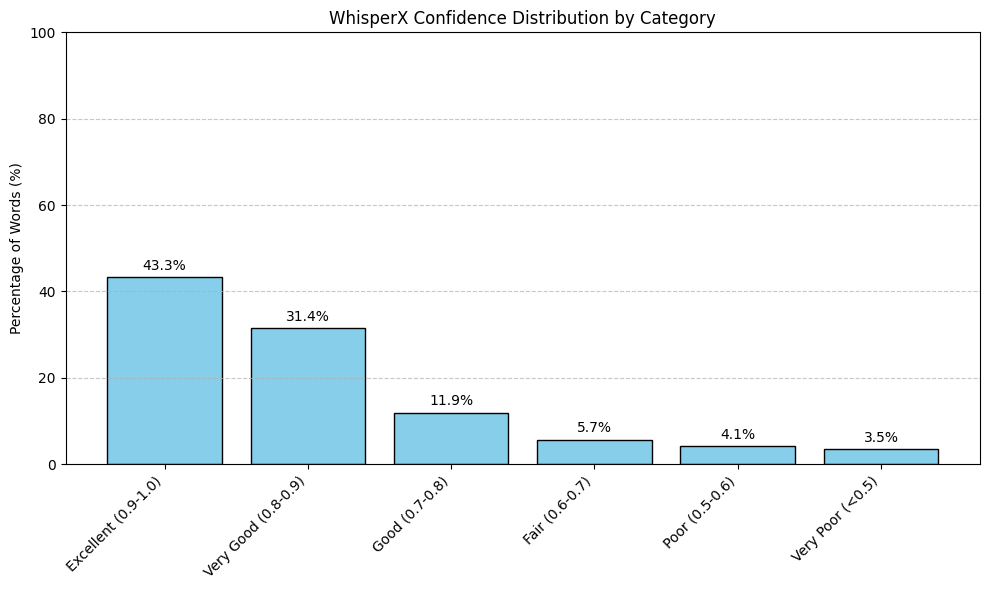

In [ ]:
import whisperx
import time
import jiwer
import sacrebleu
import librosa
import numpy as np

audio_file = "En.m4a"
reference = """I want to talk about beating stress today. You know, life here in Hong Kong is very stressful so I think today's topic is very useful for everyone because we can do something about it, just to cope with the stress. So maybe you have some change in your life, maybe big change and small change, but instead of being afraid, I think you should have a positive attitude and think of change as a normal part of life. 

And I think maybe here in Hong Kong, the family are crowded into a very small housing space, so maybe you would sometimes argue with your family and I think try to resolve the disagreement with people is very important because then you can build strong relationships and keep commitments you have made. For example, sometimes maybe you are feeling alone and you want to make some comfort and I think you can ask the people you trust for help is very important because if you have a bunch of friends, they can listen to you, then you can release some stress through talking to them. 

And do you know that actually I find a very funny thing that if you want to reduce some stress, you can reduce this by the word S-T-R-E-S-S, that's 'stress'. How about, let's begin with the 'S'. Well, I think 'S' is that you can have the 'scheduling', for example you don't have to schedule too many things in your day and if you feel you are too busy, you can cut out an activity or two. 

And how about the 'T' word? The 'T' word is 'treat your body well', because experts say that exercise can reduce stress and also if you eat healthy food, then your brain and your body get the nourishment they need. 

And the word is 'R' … the next word is 'R' – 'R' is very important, it says 'relax'. You can do an activity you enjoy or that relaxes you, maybe you can read a good book or learn a new hobby and spend time with your pet or even you can visiting a spa and that could make a very good difference. And for me, I like to play piano when I feel stressed and sometimes I may just watch some movie that make me laughs a lot. 

And the next word is 'E' – 'E' is about expectations, and I think be realistic about yourself is to true to yourself and others. So you can just do your best and don't try to be perfect and don't expect others to be too … because that will release and reduce a lot of stress for you and the people around you. 

And the next word is 'S' – 'S' is, stands for 'sleep' and I really, really love to sleep, to be honest. That's my hobby, I think, because sleep … if you get a good night's sleep, then it will keep your mind and your body in shape. And experts say if you sleep more than seven hours, you will actually get tired, so don't sleep too much in the day, just sleep it when you feel enough. 

And the last word is 'S' again. I always do this action, the 'S' word is 'smile' – if you smile and have confidence, your attitude and your thoughts influence the way you see things. And if you are a negative person, you can actually learn to think in a more positive way because that makes you feel more comfortable when you are coping with the stress. Finally I think we should take action and applies these tips to your life, so everyone can beat stress."""

device = "cpu"
model = whisperx.load_model("small", device=device, compute_type="float32")

start_time = time.time()
result = model.transcribe(audio_file)
end_time = time.time()

alignment_model, align_metadata = whisperx.load_align_model(
    language_code=result["language"], device=device
)

audio, sr = librosa.load(audio_file, sr=16000, mono=True)
duration_sec = len(audio) / sr
print(f"Loaded audio sr={sr}, duration={duration_sec:.2f}s")

result_aligned = whisperx.align(
    transcript=result["segments"],
    model=alignment_model,
    align_model_metadata=align_metadata,
    audio=audio,
    device=device,
    return_char_alignments=False
)

print("\n--- Word-Level Transcription with Real Confidence Scores ---")
all_confidences = []
low_confidence_words = []
confidence_threshold = 0.7  

for word in result_aligned["word_segments"]:
    word_text = word['word'].strip()
    start_time_word = word['start']
    end_time_word = word['end']

    confidence = float(word['score']) if 'score' in word else 0.5
    
    all_confidences.append(confidence)
    confidence_str = f" (conf: {confidence:.3f})"
    
    if confidence < confidence_threshold:
        low_confidence_words.append((word_text, confidence, start_time_word))
    
    print(f"[{start_time_word:.2f} - {end_time_word:.2f}] {word_text}{confidence_str}")

transcript_text = " ".join([w['word'].strip() for w in result_aligned["word_segments"]])
transcript_text = " ".join(transcript_text.split())  

if all_confidences:
    mean_confidence = np.mean(all_confidences)
    std_confidence = np.std(all_confidences)
    min_confidence = np.min(all_confidences)
    max_confidence = np.max(all_confidences)
    median_confidence = np.median(all_confidences)
    
    print(f"\n--- Confidence Statistics ---")
    print(f"Mean confidence: {mean_confidence:.3f}")
    print(f"Median confidence: {median_confidence:.3f}")
    print(f"Std confidence: {std_confidence:.3f}")
    print(f"Min confidence: {min_confidence:.3f}")
    print(f"Max confidence: {max_confidence:.3f}")
    print(f"Total words: {len(all_confidences)}")
    print(f"Words with confidence < {confidence_threshold}: {len(low_confidence_words)}")
    
    conf_ranges = {
        'Excellent (0.9-1.0)': sum(1 for c in all_confidences if c >= 0.9),
        'Very Good (0.8-0.9)': sum(1 for c in all_confidences if 0.8 <= c < 0.9),
        'Good (0.7-0.8)': sum(1 for c in all_confidences if 0.7 <= c < 0.8),
        'Fair (0.6-0.7)': sum(1 for c in all_confidences if 0.6 <= c < 0.7),
        'Poor (0.5-0.6)': sum(1 for c in all_confidences if 0.5 <= c < 0.6),
        'Very Poor (<0.5)': sum(1 for c in all_confidences if c < 0.5)
    }
    
    print(f"\n--- Confidence Distribution ---")
    total_words = len(all_confidences)
    for range_name, count in conf_ranges.items():
        percentage = (count / total_words) * 100
        bar = "█" * int(percentage / 2)  
        print(f"{range_name:20}: {count:3d} words ({percentage:5.1f}%) {bar}")
    
    high_conf_ratio = sum(1 for c in all_confidences if c >= 0.8) / len(all_confidences)
    very_high_conf_ratio = sum(1 for c in all_confidences if c >= 0.9) / len(all_confidences)
    
    print(f"\n--- Quality Indicators ---")
    print(f"High confidence words (≥0.8): {high_conf_ratio:.1%}")
    print(f"Very high confidence words (≥0.9): {very_high_conf_ratio:.1%}")
    
    if low_confidence_words:
        print(f"\n--- Low Confidence Words (< {confidence_threshold}) ---")
        
        low_confidence_words.sort(key=lambda x: x[1])
        for word, conf, time_stamp in low_confidence_words[:10]:  
            print(f"'{word}' at {time_stamp:.2f}s (conf: {conf:.3f})")
        if len(low_confidence_words) > 10:
            print(f"... and {len(low_confidence_words) - 10} more")

def analyze_low_confidence_patterns(word_segments, threshold=0.7):
    """Analyze patterns in low confidence words"""
    low_conf_words = [(w['word'].strip(), w['score']) for w in word_segments if w.get('score', 1) < threshold]
    
    if not low_conf_words:
        print(f"\n--- Pattern Analysis ---")
        print("No words below confidence threshold!")
        return
    
    short_words = [(w, s) for w, s in low_conf_words if len(w) <= 3]
    long_words = [(w, s) for w, s in low_conf_words if len(w) > 6]

    word_counts = {}
    for word, score in low_conf_words:
        word_lower = word.lower()
        if word_lower not in word_counts:
            word_counts[word_lower] = []
        word_counts[word_lower].append(score)
    
    repeated_problems = {w: scores for w, scores in word_counts.items() if len(scores) > 1}
    
    print(f"\n--- Low Confidence Pattern Analysis ---")
    print(f"Short words (≤3 chars) with low confidence: {len(short_words)}")
    print(f"Long words (>6 chars) with low confidence: {len(long_words)}")
    
    if repeated_problems:
        print(f"\nWords with consistently low confidence:")
        for word, scores in sorted(repeated_problems.items(), key=lambda x: len(x[1]), reverse=True)[:5]:
            avg_score = np.mean(scores)
            print(f"  '{word}': {len(scores)} occurrences, avg confidence: {avg_score:.3f}")

analyze_low_confidence_patterns(result_aligned["word_segments"])


wer = jiwer.wer(reference, transcript_text)
cer = jiwer.cer(reference, transcript_text)
chrf = sacrebleu.sentence_chrf(transcript_text, [reference]).score
rtf = (end_time - start_time) / duration_sec

print("\n--- Evaluation Metrics ---")
print(f"WER (Word Error Rate): {wer:.3f} ({wer*100:.1f}%)")
print(f"CER (Character Error Rate): {cer:.3f} ({cer*100:.1f}%)")
print(f"CHRF (Character F-score): {chrf:.3f}")
print(f"RTF (Real Time Factor): {rtf:.3f}")

def save_confidence_analysis(filename="confidence_analysis.txt"):
    """Save detailed confidence analysis to file"""
    with open(filename, 'w', encoding='utf-8') as f:
        f.write("WhisperX Confidence Analysis Report\n")
        f.write("=" * 40 + "\n\n")
        
        f.write("WORD-LEVEL TRANSCRIPTION WITH CONFIDENCE\n")
        f.write("-" * 40 + "\n")
        for word in result_aligned["word_segments"]:
            word_text = word['word'].strip()
            start_time_word = word['start']
            end_time_word = word['end']
            confidence = float(word['score']) if 'score' in word else 0.5
            f.write(f"[{start_time_word:.2f}-{end_time_word:.2f}] {word_text} (conf: {confidence:.3f})\n")
        
        f.write(f"\nSTATISTICS\n")
        f.write(f"-" * 10 + "\n")
        if all_confidences:
            f.write(f"Mean confidence: {np.mean(all_confidences):.3f}\n")
            f.write(f"Median confidence: {np.median(all_confidences):.3f}\n")
            f.write(f"Std confidence: {np.std(all_confidences):.3f}\n")
            f.write(f"Words with low confidence (<{confidence_threshold}): {len(low_confidence_words)}\n")
        
        f.write(f"\nEVALUATION\n")
        f.write(f"-" * 10 + "\n")
        f.write(f"WER: {wer:.3f}\n")
        f.write(f"CER: {cer:.3f}\n")
        f.write(f"CHRF: {chrf:.3f}\n")
        f.write(f"RTF: {rtf:.3f}\n")
    
    print(f"\nDetailed analysis saved to {filename}")

import matplotlib.pyplot as plt

total_words = len(all_confidences)
categories = list(conf_ranges.keys())
percentages = [(count / total_words) * 100 for count in conf_ranges.values()]

plt.figure(figsize=(10, 6))
bars = plt.bar(categories, percentages, color='skyblue', edgecolor='black')
plt.title("WhisperX Confidence Distribution by Category")
plt.ylabel("Percentage of Words (%)")
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar, pct in zip(bars, percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1,
             f"{pct:.1f}%", ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

